13—0 0.0
13—1 0.0
13—2 0.0
13—3 0.0
13—4 0.0
13—5 0.0
13—6 0.00704584726511865
13—7 0.020650633651018487
13—8 0.03646127504007951
13—9 0.050579738683418564
13—10 0.0609339243196981
13—11 0.0670273167516679
0—13 0.0
1—13 0.0
2—13 0.0
3—13 0.0
4—13 0.0
5—13 0.0
6—13 0.044592764424211284
7—13 0.09262968545029256
8—13 0.12012912331834814
9—13 0.12600009551059826
10—13 0.11755443693470671
11—13 0.10218193364324506
4—0 0.011012975909999608
4—1 0.02140700617636133
4—2 0.02675875772045166
0—4 0.022212769410660638
1—4 0.03562529435017754
2—4 0.03719642143994606
L175 nan
M175 1.001
L185 22.426
M185 1.047
L195 6.932
M195 1.169
L205 3.509
M205 1.399
L215 2.235
M215 1.81
L225 1.625
M225 2.602
L235 1.285
M235 4.52
WIN1 3.313
WIN2 1.433
1M85 nan
1M75 nan
1M65 141.928
1M55 36.106
1M45 15.587
1M35 6.796
1M25 4.259
1P25 2.267
1P35 1.683
1P45 1.347
1P55 1.16
1P65 1.047
1P75 1.001
1P85 1.001
2M85 nan
2M75 nan
2M65 22.426
2M55 7.288
2M45 3.886
2M35 2.466
2M25 1.79
2P25 1.263
2P35 1.144
2P45 1.069
2P55 1.02

<ipython-input-1-227335e4d697>:189: RuntimeWarning: divide by zero encountered in scalar divide
  print(item[0], (1000 / (item[1]) // 1 + 1) / 1000)
<ipython-input-1-227335e4d697>:189: RuntimeWarning: invalid value encountered in scalar floor_divide
  print(item[0], (1000 / (item[1]) // 1 + 1) / 1000)


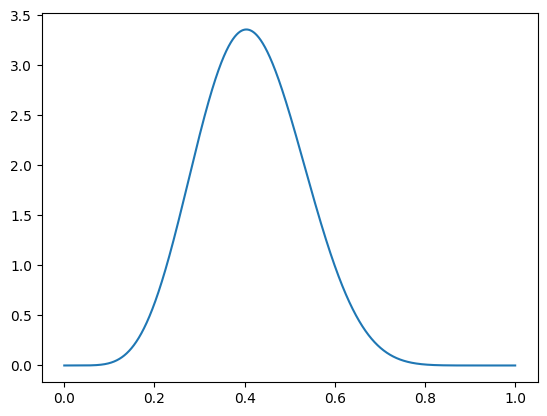

In [ ]:
'''Modules'''
import scipy
import numpy as np
import matplotlib.pyplot as plt

COEF1 = 4.3
COEF2 = 1.3
F = 6

IT = 4
rng = np.random.default_rng()


def a_if_b(b_if_a, a, b):
    '''Bayes' theorem'''
    return b_if_a * a / b


def prob_by_force(force_a, half_a):
    '''Gets probability of given 1st half result with given forces'''
    force_b = 1 - force_a
    half_b = 12 - half_a
    binom = scipy.special.binom(12, half_a)
    return float(force_a ** half_a * force_b ** half_b * binom)


def prob_force(force_a, coef_a, coef_b):
    '''Gets probability of given forces with given prior chances'''
    force_b = 1 - force_a
    beta = scipy.special.beta(coef_a, coef_b)
    return force_a ** (coef_a - 1) * force_b ** (coef_b - 1) / beta


def function(x, coef_a, coef_b, half_a):
    '''Technical function for integration'''
    half_b = 12 - half_a
    beta = scipy.special.beta(coef_a, coef_b)
    f = float(x ** half_a * (1 - x) ** half_b * scipy.special.binom(12, half_a))
    return x ** (coef_a - 1) * (1 - x) ** (coef_b - 1) / beta * f


def prior_prob(coef_a, coef_b, half_a):
    '''Gets a prior probability of given 1st half result'''
    return scipy.integrate.quad(function, 0, 1, args=(coef_a, coef_b, half_a))


def prob(force_a, coef_a, coef_b, half_a):
    '''Gets probability of given prior chances with given 1st half result'''
    b_if_a = prob_by_force(force_a, half_a)
    a = prob_force(force_a, coef_a, coef_b)
    b = prior_prob(coef_a, coef_b, half_a)[0]
    return a_if_b(b_if_a, a, b)


def rest(a, p):
    '''Gets probabilities of outcomes with given 1st half result and forces'''
    b = 12 - a
    q = 1 - p
    data = {}

    for r in range(0, b):
        data[f'13—{r}'] = 0

    for n in range(0, a):
        bc = scipy.special.binom(12 - a + n, 12 - a)
        data[f'13—{b + n}'] = float(p ** (13 - a) * q ** n * bc)

    for s in range(0, a):
        data[f'{s}—13'] = 0

    for k in range(0, b):
        bc = scipy.special.binom(12 - b + k, 12 - b)
        data[f'{a + k}—13'] = float(q ** (13 - b) * p ** k * bc)

    main_tie = float(p ** (12 - a) * q ** a * scipy.special.binom(12, 12 - a))
    tie = float(p ** 3 * q ** 3 * scipy.special.binom(6, 3))

    for ll in range(0, 3):
        bc = scipy.special.binom(3 + ll, 3)
        data[f'4—{ll}'] = main_tie * float(p ** 4 * q ** ll * bc) / (1 - tie)

    for m in range(0, 3):
        bc = scipy.special.binom(3 + m, 3)
        data[f'{m}—4'] = main_tie * float(p ** m * q ** 4 * bc) / (1 - tie)

    return data


X = np.linspace(1 / (10 ** IT), 1 - 1 / (10 ** IT), 10 ** IT - 1)
P = []

for x in X:
    P.append(prob(x, COEF2, COEF1, F))

PM = np.array(P)
PN = PM / PM.sum()
ans = np.zeros((30, 1))

for t in range(10 ** IT - 1):
    res = rest(F, X[t])
    get = np.array(list(res.values())).reshape(-1, 1)
    ans = np.hstack((ans, PN[t] * get))

out = ans.sum(axis=1)

events = {'L175': out[0:5].sum() + out[13:18].sum(),
          'M175': out[5:13].sum() + out[18:].sum(),
          'L185': out[0:6].sum() + out[13:19].sum(),
          'M185': out[6:13].sum() + out[19:].sum(),
          'L195': out[0:7].sum() + out[13:20].sum(),
          'M195': out[7:13].sum() + out[20:].sum(),
          'L205': out[0:8].sum() + out[13:21].sum(),
          'M205': out[8:13].sum() + out[21:].sum(),
          'L215': out[0:9].sum() + out[13:22].sum(),
          'M215': out[9:13].sum() + out[22:].sum(),
          'L225': out[0:10].sum() + out[13:23].sum(),
          'M225': out[10:13].sum() + out[23:].sum(),
          'L235': out[0:11].sum() + out[13:24].sum(),
          'M235': out[11:13].sum() + out[24:].sum(),
          'WIN1': out[0:13].sum() + out[24:27].sum(),
          'WIN2': out[13:24].sum() + out[27:].sum(),
          '1M85': out[0:5].sum(),
          '1M75': out[0:6].sum(),
          '1M65': out[0:7].sum(),
          '1M55': out[0:8].sum(),
          '1M45': out[0:9].sum(),
          '1M35': out[0:10].sum() + out[24:26].sum(),
          '1M25': out[0:11].sum() + out[24:27].sum(),
          '1P25': out[0:12].sum() + out[23:27].sum() + out[29],
          '1P35': out[0:12].sum() + out[22:27].sum() + out[28:].sum(),
          '1P45': out[0:12].sum() + out[21:].sum(),
          '1P55': out[0:12].sum() + out[20:].sum(),
          '1P65': out[0:12].sum() + out[19:].sum(),
          '1P75': out[0:12].sum() + out[18:].sum(),
          '1P85': out[0:12].sum() + out[17:].sum(),
          '2M85': out[12:17].sum(),
          '2M75': out[12:18].sum(),
          '2M65': out[12:19].sum(),
          '2M55': out[12:20].sum(),
          '2M45': out[12:21].sum(),
          '2M35': out[12:22].sum() + out[27],
          '2M25': out[12:23].sum() + out[27:29].sum(),
          '2P25': out[11:24].sum() + out[26:].sum(),
          '2P35': out[10:24].sum() + out[25:].sum(),
          '2P45': out[9:].sum(),
          '2P55': out[8:].sum(),
          '2P65': out[7:].sum(),
          '2P75': out[6:].sum(),
          '2P85': out[5:].sum(),
          '0013': out[12],
          '0113': out[13],
          '0213': out[14],
          '0313': out[15],
          '0413': out[16],
          '0513': out[17],
          '0613': out[18],
          '0713': out[19],
          '0813': out[20],
          '0913': out[21],
          '1013': out[22],
          '1113': out[23],
          '1212': out[24:].sum(),
          '1300': out[0],
          '1301': out[1],
          '1302': out[2],
          '1303': out[3],
          '1304': out[4],
          '1305': out[5],
          '1306': out[6],
          '1307': out[7],
          '1308': out[8],
          '1309': out[9],
          '1310': out[10],
          '1311': out[11],
          'EVEN': out[1:24:2].sum() + out[24:27:2].sum() + out[27::2].sum(),
          'TODD': out[0:24:2].sum() + out[25].sum() + out[28].sum(),
          '125L': out[12:24].sum(),
          '125M': out[:12].sum() + out[24:].sum(),
          '225L': out[:12].sum(),
          '225M': out[12:].sum(),
          'W1CL': out[:12].sum(),
          'W2CL': out[12:24].sum(),
          'DRAW': out[24:].sum()}

for v in range(30):
    print(list(res.keys())[v], float(out[v]))

for item in events.items():
    print(item[0], (1000 / (item[1]) // 1 + 1) / 1000)

plt.plot(X, PM)
